# RandomForest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Loading data

In [48]:
airplanedf = pd.read_csv('../AirplaneDataset/train.csv', index_col=0)
airplanedf.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [49]:
airplanetest = pd.read_csv('../AirplaneDataset/test.csv', index_col=0)
airplanetest.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [50]:
categorical_indexes = [0, 1, 3, 4, 22] + list(range(6, 20))
def preprocessing(data):
    data.set_index('id', inplace=True)
    
    data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')
    return data

airplanedf = preprocessing(airplanedf)
airplanetest = preprocessing(airplanetest)

C:\Users\cyber\AppData\Local\Temp\ipykernel_4728\2289432898.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')
C:\Users\cyber\AppData\Local\Temp\ipykernel_4728\2289432898.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')


In [51]:
intdf = pd.DataFrame(airplanedf)
for i in categorical_indexes:
    intdf.iloc[:, i] = intdf.iloc[:, i].cat.codes
intdf.iloc[:,categorical_indexes] = intdf.iloc[:,categorical_indexes].astype('int')

intdf.head()

C:\Users\cyber\AppData\Local\Temp\ipykernel_4728\3029013187.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  intdf.iloc[:, i] = intdf.iloc[:, i].cat.codes


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,1,0,13,1,2,460,3,4,3,1,...,5,4,3,3,4,5,5,25,18.0,0
5047,1,1,25,0,0,235,3,2,3,3,...,1,1,5,2,1,4,1,1,6.0,0
110028,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,3,4,4,5,0,0.0,1
24026,0,0,25,0,0,562,2,5,5,5,...,2,2,5,2,1,4,2,11,9.0,0
119299,1,0,61,0,0,214,3,3,3,3,...,3,3,4,3,3,3,3,0,0.0,1


In [52]:
intdftest = pd.DataFrame(airplanetest)
for i in categorical_indexes:
    intdftest.iloc[:, i] = intdftest.iloc[:, i].cat.codes
intdftest.iloc[:,categorical_indexes] = intdftest.iloc[:,categorical_indexes].astype('int')

intdftest.head()

C:\Users\cyber\AppData\Local\Temp\ipykernel_4728\2879725165.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  intdftest.iloc[:, i] = intdftest.iloc[:, i].cat.codes


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
19556,0,0,52,0,1,160,5,4,3,3,...,5,5,5,4,1,5,5,50,44.0,1
90035,0,0,36,0,0,2863,1,1,3,0,...,4,4,4,3,2,4,5,0,0.0,1
12360,1,1,20,0,1,192,2,0,2,3,...,2,4,1,2,1,2,2,0,0.0,0
77959,1,0,44,0,0,3377,0,0,0,1,...,1,1,1,0,2,1,4,0,6.0,1
36875,0,0,49,0,1,1182,2,3,4,2,...,2,2,2,1,3,2,4,0,20.0,1


In [53]:
#Check for null values in train set
print(intdf.isnull().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


In [54]:
intdf.iloc[:, 21].fillna(intdf.iloc[:, 21].mean(), inplace=True)

In [55]:
#Check again for null values in train set
print(intdf.isnull().sum())

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [56]:
X_train = intdf.iloc[:, 0:22]
y_train = intdf.iloc[:, 22]

In [57]:
#Check for null values
print(intdftest.isnull().sum())

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


In [58]:
intdftest.iloc[:, 21].fillna(intdftest.iloc[:, 21].mean(), inplace=True)

In [59]:
X_test = intdftest.iloc[:, 0:22]
y_test = intdftest.iloc[:, 22]

In [63]:
print("X_train shape: ")
print(X_train.shape)
print("X_test shape: ")
print(X_test.shape)
print("--------------")
print("Y_train shape: ")
print(y_train.shape)
print("Y_test shape: ")
print(y_test.shape)

X_train shape: 
(103904, 22)
X_test shape: 
(25976, 22)
--------------
Y_train shape: 
(103904,)
Y_test shape: 
(25976,)


## Default model (No hyperparameters applied)

In [65]:
model = RandomForestClassifier()
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [67]:
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred) * 100) + '%')

Accuracy: 0.9484139205420388


In [68]:
kfold=KFold(n_splits=5)
cv_score=[]

x=X_train.values
y=y_train.values
model=RandomForestClassifier()

n_iter=0
for train_index, test_index in kfold.split(x):
    x_train, x_test=x[train_index],x[test_index]
    y_train, y_test=y[train_index],y[test_index]
    
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    n_iter=n_iter+1
    
    acc_train=f1_score(y_train,y_pred_train)
    acc_test=f1_score(y_test,y_pred_test)
    cv_score.append(acc_test)
    
    print("Modeling ",n_iter,"st")
    print('train set f1_score: ',acc_train)
    print('test set f1_score: ',acc_test)
    print("-----------------------------------------")
    
print('Mean test set f1_score: ',np.mean(cv_score))

Modeling  1 st
train set f1_score:  1.0
test set f1_score:  0.9550869735443818
-----------------------------------------
Modeling  2 st
train set f1_score:  1.0
test set f1_score:  0.9564387560345796
-----------------------------------------
Modeling  3 st
train set f1_score:  1.0
test set f1_score:  0.9538567099319573
-----------------------------------------
Modeling  4 st
train set f1_score:  0.9999721835883171
test set f1_score:  0.9562921348314607
-----------------------------------------
Modeling  5 st
train set f1_score:  1.0
test set f1_score:  0.9573934837092732
-----------------------------------------
Mean test set f1_score:  0.9558136116103306


In [42]:
model=RandomForestClassifier()
param={'max_depth':[None,5,8],'class_weight':[None,'balanced'],'n_estimators':[100,200,300],'min_samples_split':[2,3,4]}

grid_model=GridSearchCV(model,param_grid=param, cv=5,scoring='f1', n_jobs=-1)
grid_model.fit(X_train, y_train)
result2=pd.DataFrame(grid_model.cv_results_)

In [43]:
grid_model.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
X_train = intdf.iloc[:, 0:22]
y_train = intdf.iloc[:, 22]

X_test = intdftest.iloc[:, 0:22]
y_test = intdftest.iloc[:, 22]

In [75]:
y_train.shape

(103904,)

In [76]:
model = RandomForestClassifier(class_weight=None, max_depth=None, min_samples_split=2, n_estimators=200)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

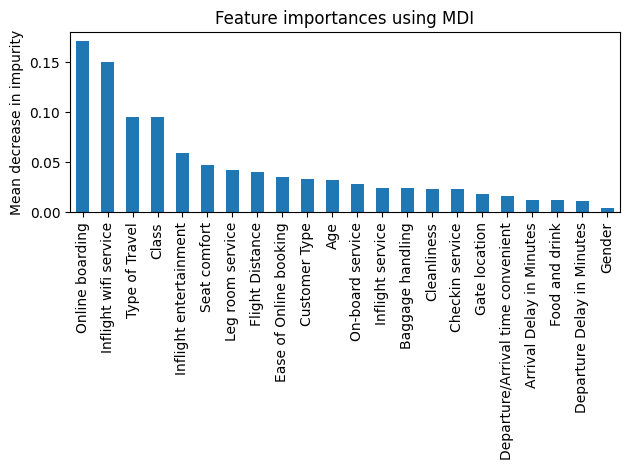

In [79]:
feature_names = X_train.columns
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [82]:
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred) * 100) + '%')

Accuracy: 94.93%
